In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from chainconsumer import ChainConsumer

In [7]:
root = "/home/abhirup.ghosh/Documents/Work/spinqnm/runs/"

paramdict = {"bilby": ['mass_1', 'mass_2', 'chi_eff', 'final_mass', 'final_spin', 'domega220', 'dtau220'],
            "li": ['m1', 'm2', 'chi_eff', 'mf_evol', 'af_evol', 'domega220', 'dtau220']}

postlocdict = {"bilby": "bilby_integration/test_v14_GW150914_realdata_aligned_spin_nlive4096_calib_pilby/pesummary/samples/1648977771_GW150914_0_result_pesummary.dat",
               "li": "O3b/TGR/GW150914/ProdRuns/220_prod3/cbcBayes/posterior_samples.dat"}

datadict = {"bilby": [],
           "li": []}

for key in postlocdict.keys():
    datadict[key] = pd.read_csv(root + postlocdict[key], delimiter="\t", usecols=paramdict[key])

In [8]:
datadict["bilby"].rename(columns=dict(zip(paramdict["bilby"], paramdict["li"])), inplace=True) 

In [9]:
datadict["bilby"].head()

,domega220,dtau220,m1,m2,chi_eff,af_evol,mf_evol
0,0.203424,-0.221057,42.574894,35.802980,0.145588,0.739119,74.239762
1,0.090484,0.090415,47.084530,23.111015,-0.067656,0.583618,67.625370
2,0.035482,-0.242316,42.242944,25.120545,-0.213014,0.567186,64.812927
3,0.286747,0.404080,42.483034,29.738703,0.058745,0.691746,68.808175
4,0.197956,0.051045,54.122822,26.089090,0.107805,0.657025,76.973503


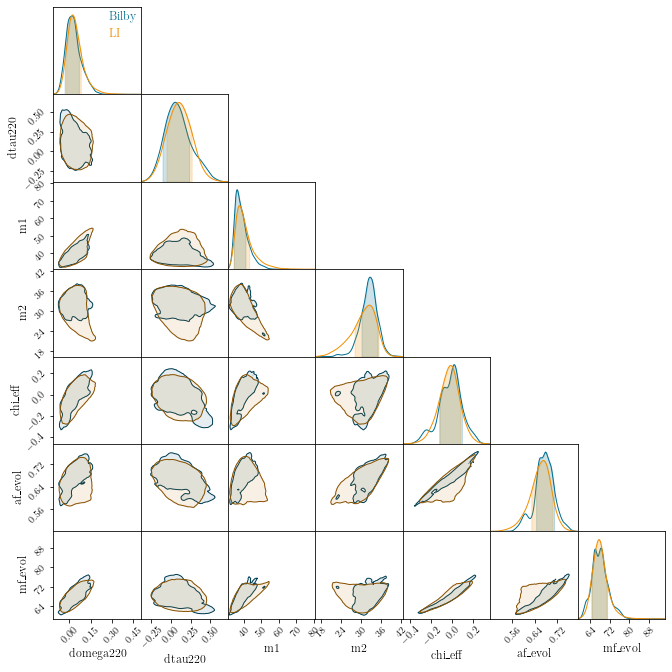

In [17]:
c = ChainConsumer()
c.add_chain(datadict["bilby"], name="Bilby",kde=True, color="#006e90")
c.add_chain(datadict["li"], name="LI", kde=True, color="#f18f01")
c.configure(smooth=3, shade_alpha=0.1, sigmas=[1.645], legend_location=(0,0))
fig = c.plotter.plot(figsize=(10,10))
plt.savefig("./bilby_integration.png")